# Data Frames

Data frames are the most important data type in R. They can be considered as matrix where columns can be of different types, in fact, data frames are just a collection of lists. <btr>
Usually, data frames can be considered as sets of obervations (from an experiment, for example) where the rows are observations values and the columns the observation variables.


    Sepal.Length Sepal.Width Petal.Length Petal.Width    Species
1            5.1         3.5          1.4         0.2     setosa
2            4.9         3.0          1.4         0.2     setosa
3            4.7         3.2          1.3         0.2     setosa
4            4.6         3.1          1.5         0.2     setosa
5            5.0         3.6          1.4         0.2     setosa
6            5.4         3.9          1.7         0.4     setosa
7            4.6         3.4          1.4         0.3     setosa
8            5.0         3.4          1.5         0.2     setosa
9            4.4         2.9          1.4         0.2     setosa
10           4.9         3.1          1.5         0.1     setosa
11           5.4         3.7          1.5         0.2     setosa
12           4.8         3.4          1.6         0.2     setosa
13           4.8         3.0          1.4         0.1     setosa
14           4.3         3.0          1.1         0.1     setosa
15           5.8         

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
145,6.7,3.3,5.7,2.5,virginica
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica
150,5.9,3.0,5.1,1.8,virginica


'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


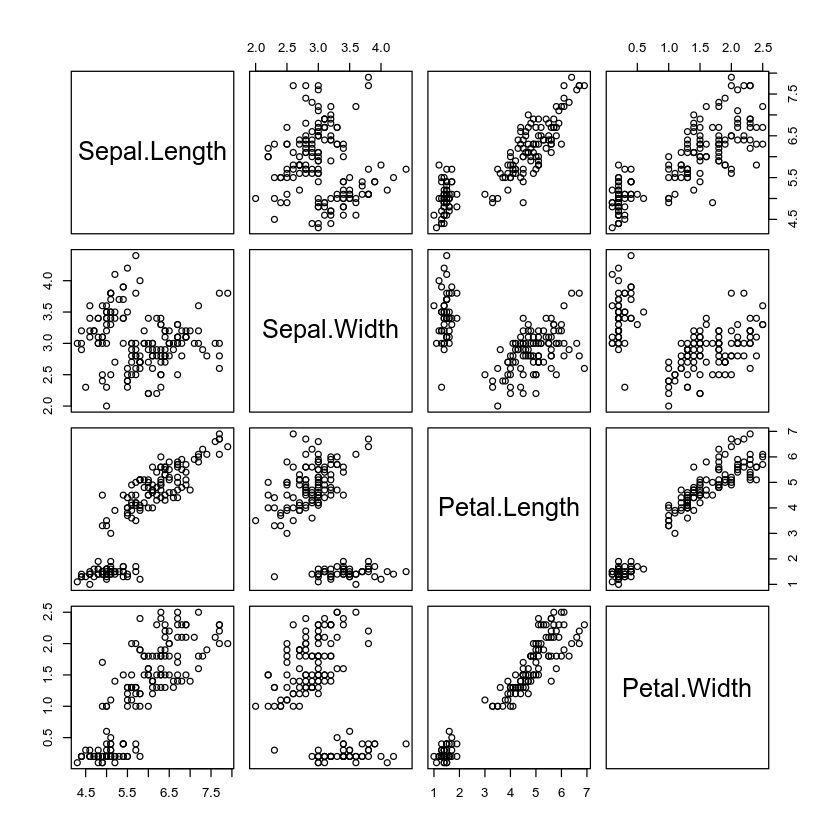

In [24]:
# iris is one of R pre-loaded data frames, let's print it 
print(iris)

# print the first lines
head(iris)


# print the last lines
tail(iris)

# print the structure (the type of each columns)
str(iris)

# make a pairs plot. Each column is plotted agains the others. This plot is very useful to have a general idea about the data frame
pairs(iris[,-ncol(iris)])



## Manually call data.frame

You can also manually create data frames




In [25]:
players <- c("Alice", "Bob", "John", "Richard")
sex <- factor(c("F", "M", "M", "M"))
age <- c(20, 26, 25, 65)

df <- data.frame(Players = players, Sex = sex, Age = age)
df

Players,Sex,Age
<chr>,<fct>,<dbl>
Alice,F,20
Bob,M,26
John,M,25
Richard,M,65


## Subsetting data frames
Data frames can be subsetted in the same way as the matrices as we saw before.
Single columns can be selected with the dollar operator. Be careful that the result of selecting with the dollar is a vector

In [26]:
"Second and third row"
iris[2:3,]

"One element"
iris[2,4]

"One full column" 
iris$Sepal.Length


[1] "Second and third row"

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


[1] "One element"

[1] 0.2

[1] "One full column"

[1] 5.1 4.9 4.7 4.6 5.0 5.4 4.6 5.0 4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 [19] 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.0 5.0 5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.0
 [37] 5.5 4.9 4.4 5.1 5.0 4.5 4.4 5.0 5.1 4.8 5.1 4.6 5.3 5.0 7.0 6.4 6.9 5.5
 [55] 6.5 5.7 6.3 4.9 6.6 5.2 5.0 5.9 6.0 6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 [73] 6.3 6.1 6.4 6.6 6.8 6.7 6.0 5.7 5.5 5.5 5.8 6.0 5.4 6.0 6.7 6.3 5.6 5.5
 [91] 5.5 6.1 5.8 5.0 5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
[109] 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.0 6.9 5.6 7.7 6.3 6.7 7.2
[127] 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.0 6.9 6.7 6.9 5.8 6.8
[145] 6.7 6.7 6.3 6.5 6.2 5.9

## subset function

A useful function to subset data frame is the "subset" function, which allow you to select some part od the data frame based on some conditions

In [27]:

"Select only setosa species"
head( subset(iris, subset = Species == "setosa") )

"Select only sepal width between 3 and 4"
head( subset(iris, subset = (Sepal.Width > 3 & Sepal.Width < 4)) )


[1] "Select only setosa species"

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


[1] "Select only sepal width between 3 and 4"

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa


## Sorting data frames

To sort data frames by one column, use the "order" function on some column

In [28]:
"Sort by sepal width"
head( iris[order(iris$Sepal.Width), ] )

"Sort by sepal width, inverse order"
head( iris[order(iris$Sepal.Width, decreasing = T), ] )



[1] "Sort by sepal width"

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
61,5.0,2.0,3.5,1.0,versicolor
63,6.0,2.2,4.0,1.0,versicolor
69,6.2,2.2,4.5,1.5,versicolor
120,6.0,2.2,5.0,1.5,virginica
42,4.5,2.3,1.3,0.3,setosa
54,5.5,2.3,4.0,1.3,versicolor


[1] "Sort by sepal width, inverse order"

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
16,5.7,4.4,1.5,0.4,setosa
34,5.5,4.2,1.4,0.2,setosa
33,5.2,4.1,1.5,0.1,setosa
15,5.8,4.0,1.2,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
17,5.4,3.9,1.3,0.4,setosa


## Wide to long format

The data frame iris that we saw before is in "wide" format. Many functions in R expect data to be in a "long" format rather than a wide format (especially the ggplot functions that will see later on in the course). <br>
For more examples, see https://www.datacamp.com/community/tutorials/long-wide-data-R

In [29]:
library(reshape2)

head(iris)

# turn iris into long format
m <- melt(iris, id.vars =  c("Species"))
head(m)

# turn long format back to wide format. dcast requires a formula (y ~ x) defining how the data frame should look like
d <- dcast(m,   1:nrow(iris) + Species ~ variable, value.var  = "value")
head(d)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


,Species,variable,value
,<fct>,<fct>,<dbl>
1,setosa,Sepal.Length,5.1
2,setosa,Sepal.Length,4.9
3,setosa,Sepal.Length,4.7
4,setosa,Sepal.Length,4.6
5,setosa,Sepal.Length,5.0
6,setosa,Sepal.Length,5.4


,1:nrow(iris),Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,setosa,5.1,3.5,1.4,0.2
2,2,setosa,4.9,3.0,1.4,0.2
3,3,setosa,4.7,3.2,1.3,0.2
4,4,setosa,4.6,3.1,1.5,0.2
5,5,setosa,5.0,3.6,1.4,0.2
6,6,setosa,5.4,3.9,1.7,0.4


## Grouping operations

Grouping operations are useful to calculate summaries statistics based on some group, they are similar to the tapply function that we saw before. <br> <br>


For best use of grouping, check the dplyr package, which is part of the tidyverse package https://dplyr.tidyverse.org/


In [34]:
"*********** Summary of each column ***********"
summary(iris)

"*********** How many species counts are there? ***********"
table(iris$Species)

head(iris)
"***********Mean of sepal data by Species***********"
aggregate(x = iris[, -ncol(iris)], by = list(iris$Species), FUN = mean)

# If you need more complicated operations, use an "anonimous" function
"***********Quantiles of sepal data by Species***********"
aggregate(x = iris[, -ncol(iris)], by = list(iris$Species), FUN = function(x)  quantile(x, probs = c(0.25, 0.75), na.rm = T)  )


[1] "*********** Summary of each column ***********"

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

[1] "*********** How many species counts are there? ***********"


    setosa versicolor  virginica 
        50         50         50 

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


[1] "***********Mean of sepal data by Species***********"

Group.1,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


[1] "***********Quantiles of sepal data by Species***********"

Group.1,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
<fct>,"<dbl[,2]>","<dbl[,2]>","<dbl[,2]>","<dbl[,2]>"
setosa,"4.800, 5.2","3.200, 3.675","1.4, 1.575","0.2, 0.3"
versicolor,"5.600, 6.3","2.525, 3.000","4.0, 4.600","1.2, 1.5"
virginica,"6.225, 6.9","2.800, 3.175","5.1, 5.875","1.8, 2.3"


## Reading data frames from files

R provides quick functions to read data frames from files: read.table, read.csv and read.delim. read.csv and read.delim are just wrappers for read.table, have a look at the documentation to see what they actually do.


In [31]:
df <- read.table("Data/USArrests.csv", sep=",")
head(df)

str(df)


,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


'data.frame':	50 obs. of  4 variables:
 $ Murder  : num  13.2 10 8.1 8.8 9 7.9 3.3 5.9 15.4 17.4 ...
 $ Assault : int  236 263 294 190 276 204 110 238 335 211 ...
 $ UrbanPop: int  58 48 80 50 91 78 77 72 80 60 ...
 $ Rape    : num  21.2 44.5 31 19.5 40.6 38.7 11.1 15.8 31.9 25.8 ...


## Writing data frames to files

Use write.table to write a data frame to a file. 

In [32]:
players <- c("Alice", "Bob", "John", "Richard")
sex <- factor(c("F", "M", "M", "M"))
age <- c(20, 26, 25, 65)

df <- data.frame(Players = players, Sex = sex, Age = age)

write.table(df, "Data/players.tsv", sep="\t")

# removes quotes
#write.table(df, "Data/players.tsv", sep="\t", quote = F)

# removes rownames
#write.table(df, "Data/players.tsv", sep="\t", quote = F, row.names = F)
